<a href="https://colab.research.google.com/github/soumendra375/DEEP-LEARNING/blob/master/1_Getting_started_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEEP LEARNING
INTRODUCTION TO KERAS
1.0 GETTING STARTED WITH KERAS
This notebook will provide a first look at using the keras package to define, train and evaluate deep learning models with keras. By the end of this lesson you will be able to work with basic feedforward architecture multi-layer neural nets. Feedforward networks are one of a class of basic models called sequential models which are easy to define with keras. Further, some basic regularization methods are converted.

1.1 KERAS ARCHITECTURE

Keras is a wrapper over other deep learning frameworks. Keras provides consistent and simplified APIs for using these underlying frameworks. 

1.2 Overview of Keras documentation

One of the many nice features of keras is complete and useful documentation. Complete documentation including installation instructions can be found on the keras website. As you learn to work with keras. you will want to refer to the well-indexed documentation and examples on this site.

2.0 A FIRST FEED-FORWARD KERAS EXAMPLE

We build a simple feedforward neural network to classify handwritten digits from the famous MNIST data set. MNIST contains 60,000 labelled training images and 10,000 test images. Many people consider the MNIST dataset as the 'hello world' problem of deep learning.

2.1 LOADING THE MNIST DATA SET

MNIST is built in too the keras.datasets package. We only need to import this package and then load it.

The first step is to import the packages we will need for the rest of this notebook. Execute the code in the cell below to load these packages. This code should execute without errors or warnings if everything is installed correctly.

In [1]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.optimizers import rmsprop
import numpy as np
import numpy.random as nr
from tensorflow import set_random_seed
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Notice that the TensorFlow backened has been loaded along with various keras packages. keras is making calls to Tensor Flow to perform computations.

Now, load the training and testing images and corresponding labels by executing the coded in the cell below. The load_data method creates two tuples of the images and labels for training and testing models.

In [2]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


with the data loaded, let's have a peak at some of the content. The images of the handwritten digits are represented as rectangular arrays of dimension 28x28. 

In [3]:
print(train_images[4].shape)

(28, 28)


The handwritten images are all gray-scale, so do not have a color dimension.
The code in the cell below displays 4 of the 60,000 images of handwritten digits along with their labels. Execute this code and examine the results.

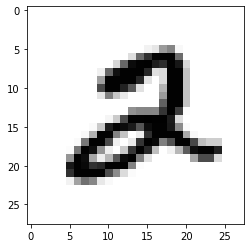

Label = 2


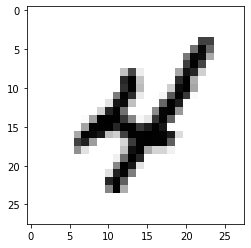

Label = 4


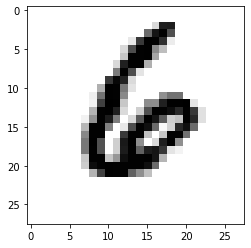

Label = 6


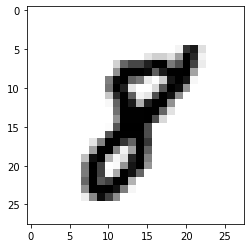

Label = 8


In [4]:
for i in range(5, 20, 4):
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.show()
  print('Label = ' + str(train_labels[i]))

2.2 PREPARE THE DATA FOR TRAINING

The MNIST images are stored as 3-d tensor. Each image tensor has dimensions 6000x28x28. However, to train a neural network on these images we must flatten this representation so that each image is a vector of length 28*28. The result will be a 2-d tensor of dimensions 60000x(28*28).

Further, models created with keras, and most other deep learning frameworks, operate on floating point numbers. The gray scale pixel values of the images are coded as integers in the range{0,255}. These pixel values must be coerced to floating point and then standardized to be in a range {0.0, 1.0}. As is the case for training many machine learning models, it is best to use standardized values for training deep neural networks.

The code in the cell below flattens the images and converts the pixel values to a standardized values for training deep neural networks.

In [5]:
print(train_images.shape, train_labels.shape)
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28) (60000,)
(60000, 784)
float32


Notice the original shape and resulting shape of the training image tensor. In addition, the array is now of type float32.
Execute the code in the cell below to apply the same transformation to the test images.

In [7]:
print(test_images.shape, test_labels.shape)
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
print(test_images.shape)

(10000, 784) (10000,)
(10000, 784)


Since we are working on classification problem, the labels values must be of a categorical type. Execute the code in the cell below and examine the coding of these labels.

In [9]:
print(train_labels[5:,])

[2 1 3 ... 5 6 8]


The labels are coded as integers corresponding to the digit in the image. These values must be coerced to a categorical type. For keras, categorical types must be one hot encoded. One hot encoding is a set of binary columns, one for each category.
Fortunately the to_categorical method in the keras.utils.np_utils package does just this. Execute the code in the cell below and examine the printed results.

In [10]:
train_labels = ku.to_categorical(train_labels)
print(train_labels[5:,])

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Notice that the label values have been converted from integers to a set of 10 dummy variables of the one hot encoding. The columns of the dummy variables represent digits in the range{0,9}. One dummy variable per case will be coded as 1 and the rest coded as 0. For example the first row in the example above encodes a 2, and the second row encodes a 1.

After Executing the code in the cell below to coerce the test labels to dummy variables.

In [0]:
test_labels = ku.to_categorical(test_labels)

2.3 DEFINING A SEQUENTIAL MODEL
The data is prepared, so it is time to start defining a neural network model. We are using a simple feedforward model which is one type of sequential model keras can create. There is general receipe for defining sequential Keras models:
1. Define a sequential model object.
2. Define one or more hidden layers.
3. Define an output layer.

Specially in this case, the sequential model is defined as follows:
1. A sequential model object nn is defined.
2. A single hidden layer is defined.
    This layer is dense(fully connected) with 512 units.
    The activation of each unit is rectilinear.
    The hidden layer is expecting an input tensor of 28*28by an undefined number of case(images)
3.The output layer has 10 hidden units.
    We need 10 units since there are 10 categories of handwritten digits we are classifying.
    This is a Multinomial classification problem so we are using softmax activation.




Execute this code to define the model.

In [14]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nn.add(layers.Dense(10, activation = 'softmax'))

2.4 TRAINING AND EVALUATING THE SEQUENTIAL MODEL

With a defined model it is time to train and evaluate it. First, the model must be compiled by executing the code below. This call specifies the following:



1.   Specify an optimiser
2.   Specify a loss function. In this case we are performing Multinomial classification so we are using categorical_crossentropy.
3.   Specify one or more metrics used to evaluate the performance of the model. In this case we are using just one metric, accuracy.
We Will discuss the technical details of the model in subsequent lessons.



In [16]:
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Now, the model is ready to be trained using the fit method by executing the code in the cell below. The fit method has several argumants:


1.   The training features.
2.   The training labels.
3.   The number of epochs(iterations)over which the model is trained.
4.   The batch size used for the optimizer. The meaning of this will be discussed in the leson on optimization.




In [17]:
nr.seed(9898)
set_random_seed(9777)
nn.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 5s 77us/step - loss: 0.2583 - acc: 0.9245
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1059 - acc: 0.9680
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0713 - acc: 0.9785
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0521 - acc: 0.9843
Epoch 5/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0391 - acc: 0.9878


Notice that the loss declines and the accuracy increases with each training epoch. However, since neural networks tend to be over-fit, these improved figures may or may not indicate that the model is actually getting better. Keep in mind that the model may simply be learning the training data.
It is necessary to test the model on independent data set. The evaluate method allows you to do just this. Execute the code in the cell below and compare the results to training results.

In [18]:
nn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 47us/step


[2.299931149291992, 0.0892]

It appears that the model is over-fit since the evaluation loss and accuracy are a bit worse than observed in training.

3.0 TRAINING OVER EPOCHS
In order to determine at what point a model is overfit during training it is necessary to evaluate the model after each training epoch. A history object is created which contains the history of various metrics during the training or fitting process.

Notice that the validation_data argument must be specified so that performance of the model can be computed at the end or each epoch. The printed history of the training will include the validation loss and validation accuracy for each epoch.

Expect execution of this code to take a while.

In [19]:
## Define a sequential model and print a summary
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu' , input_shape = (28*28, )))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model.
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
## Fit the model saving the results to a history file
nr.seed(4678)
set_random_seed(8866)
history = nnt.fit(train_images, train_labels,
                  epochs = 10, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2658 - acc: 0.9224 - val_loss: 2.2936 - val_acc: 0.0892
Epoch 2/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.1075 - acc: 0.9681 - val_loss: 2.2999 - val_acc: 0.0892
Epoch 3/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.0701 - acc: 0.9789 - val_loss: 2.3059 - val_acc: 0.0892
Epoch 4/10
60000/60000 [=========================

To aid in understanding these figures it will help to make some plots comparing the training and evaluation performance as the training epochs evolve. The code in the next two cells does this is a somewhat primitive manner. The Numpy array is manually edited to include the training loss and training accuracy.

The plot_loss and plot_accuracy functions, in the next two cell, plot the training loss or accuracy in blue and the test loss or accuracy in red.Execute the code and examine the plots.

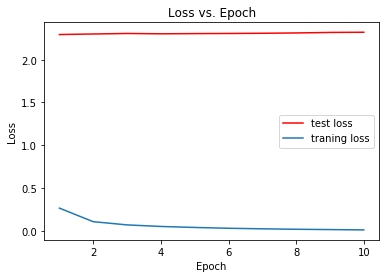

In [25]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    
plot_loss(history)  

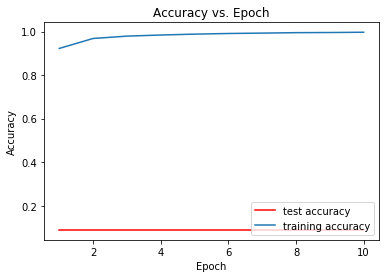

In [26]:
def plot_accuracy(history):
    train_acc = history.history['acc']
    test_acc = history.history['val_acc']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
    
plot_accuracy(history)    

Notice that the training loss and accuracy continue to improve throughout the epochs. however, the evaluation loss and accuracy only improve significantly for the first four, or perhaps 5, epochs. This is clear evidence that subsequent epochs are simply over-fitting the model.

4.0 ADDING HIDDEN LAYERS

Next, we will add an additional hidden layer to the model. Additional layers add capacity to the model to represent complex function. However, the network becomes more susceptible to over fitting. Details of model capacity are discussed in other lesons.

The code in the cell below defines a model similar to the first one, but with a second layer defined. Notice that the definition of the two layer model is nearly the same as for the single layer model. In this case, the second layer has the same number of units and activation function as the first.

However, notice that the input_shape does not to be defined for hidden layers past the first. Keras will determine the dimensions of tensors passed between layers beyond the input.

Expect execution of this code to take a while

In [28]:
## Define a sequential model
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(512, activation = 'relu'))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

## Fit the model, saving the results to a history file.
nr.seed(2432)
set_random_seed(5544)
history = nnt.fit(train_images, train_labels,
                  epochs = 20, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.2233 - acc: 0.9311 - val_loss: 2.2673 - val_acc: 0.0892
Epoch 2/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0833 - acc: 0.9744 - val_loss: 2.2809 - val_acc: 0.0892
Epoch 3/20
60000/60000 [============================

As before we can best understand these results by creating plots of the loss and accuracy for training and evaluation vs. epoch. Execute the code in the two cells below to display these plots and study the results.

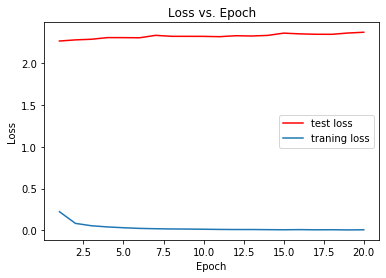

In [30]:
plot_loss(history)

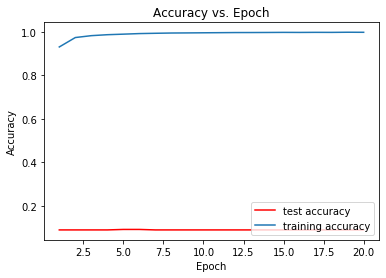

In [31]:
plot_accuracy(history)

SO here we see that after epoch four the true (training) loss actually, whereas the training loss continues to decrease. This is a clear indication of overfitting.
When compared to the single layer example, the over-fitting is more obvious. This should not be a suprise, since the number of weights has nearly doubled from the single layer model

5.0 ADDING REGULARIZATION TO THE MODEL

Regularization is used to prevent over-fitting of machine learning models including neural networks. The keras regularizers package provides L1 and L2 regularization methods. 

The code in the cell below adds the kernel_regularizer argument with the value of regularizer.12(0.01). This adds a weight decay penalty of 0.01 to the model weights.

Executing the code below

In [34]:
## Define the layers of the sequential model and print a summary
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ),
                     kernel_regularizer=regularizers.l2(0.001)))
nnt.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Define an optimizer object and compile the model
optimizer = rmsprop()
nnt.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Fit the compiled model
nr.seed(8765)
set_random_seed(7654)
history = nnt.fit(train_images, train_labels,
                  epochs = 20, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.6527 - acc: 0.9206 - val_loss: 2.4782 - val_acc: 0.0892
Epoch 2/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.2719 - acc: 0.9597 - val_loss: 2.4386 - val_acc: 0.0892
Epoch 3/20
60000/60000 [============================

Once again, we can best understand these results by creating plots of the loss and accuracy for training and evaluation vs. epoch. Execute the code in the two cells below to display these plots and study the results.

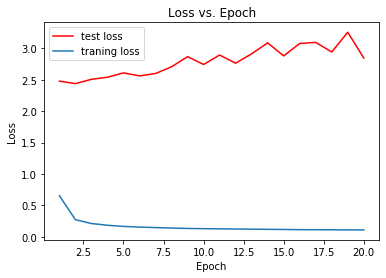

In [35]:
plot_loss(history)

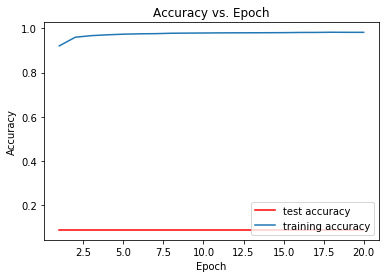

In [36]:
plot_accuracy(history)